In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import numpy as np
import pandas as pd
import mylib as lib

data = lib.readcsv('data\ind30_m_vw_rets.csv')
#data.head()
data.columns = data.columns.str.strip()
#data.columns

In [12]:
history_return = lib.annualized_return(data["1996":"2000"])
cov = data["1996":"2000"].cov()

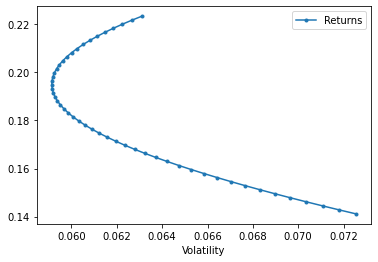

In [13]:
assets = ["Fin", "Beer"]
lib.potfolio_frontier_2(50, history_return[assets], cov.loc[assets,assets])

In [54]:
riskfree_rate = 0.02
msr = lib.max_sharpe_ratio(riskfree_rate, history_return, cov)
msr_ret = lib.portfolio_ret(msr, history_return)
msr_vol = lib.portfolio_vol(msr, cov)

[0.0, 0.035600216694721604]
[0.02, 0.22137996273516977]


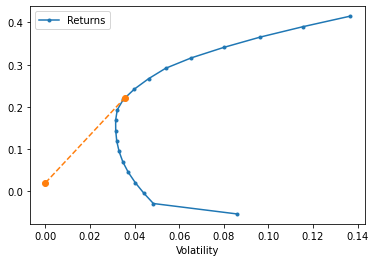

In [55]:
graph = lib.potfolio_frontier_n(20, history_return, cov)
cml_x = [0.0, msr_vol]
print(cml_x)
cml_y = [riskfree_rate, msr_ret]
print(cml_y)
graph.plot(cml_x, cml_y, marker="o", linestyle="dashed")

Optimizer:
     fun: -3.7430382980900614
     jac: array([-0.29319835, -0.18175551, -0.29452404,  0.83209279])
 message: 'Optimization terminated successfully.'
    nfev: 31
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([7.30072082e-01, 4.56883424e-17, 2.69927918e-01, 2.14107350e-16])
Capital Market Line:
Volatility: 0.06813004862541648
Return: 0.27501338125567204


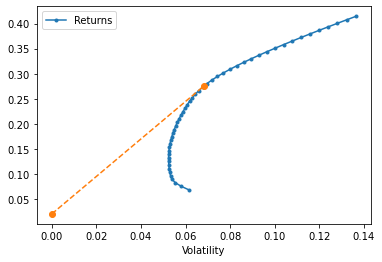

In [69]:
assets = ["Fin", "Beer", "Coal", "Games"]
lib.portfolio_frontier_n_with_msr(riskfree_rate, 50, history_return[assets], cov.loc[assets,assets])